In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#import scikitplot as skplt

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from google.colab import files

files.upload()

TypeError: ignored

In [ ]:
df=pd.read_excel('CustomerChurn.xlsx')
#df=pd.read_csv('CustomerChurn.csv')
df.head()

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.dtypes # check types

LoyaltyID              int64
Customer ID           object
Senior Citizen        object
Partner               object
Dependents            object
Tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn                 object
dtype: object

In [ ]:
#check for null values
df.isnull().sum()

LoyaltyID            0
Customer ID          0
Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [ ]:
#check for nan values
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce') #check if there is nan values
df.isnull().sum()

LoyaltyID             0
Customer ID           0
Senior Citizen        0
Partner               0
Dependents            0
Tenure                0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn                 0
dtype: int64

In [ ]:
df[df['Tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [ ]:
#delete the rows which has 0 value in Tenure as the total charge has none values 
df.drop(labels=df[df['Tenure'] == 0].index, axis=0, inplace=True)
df[df['Tenure'] == 0].index

Int64Index([], dtype='int64')

In [ ]:
colors =['#069AF3','#FF4500','#3f88c5','#ffba08','#d00000']

fig = go.Figure(go.Pie(labels=['No','Yes'],values=df.Churn.value_counts(),name='Churn'))
fig.update_traces(hole=.4, hoverinfo="label+percent", textfont_size=16,marker={'colors':colors})
fig.update_layout(height=400, width=400, title_text='<b style="color:#000000;">Percent of Churn</b>')
fig.show()

In [ ]:
df = df.copy()
df['count'] = 1

def plot_figures(column):
    fig = px.sunburst(df,path=[column,'Churn'],values='count',names=column,color_discrete_sequence=colors)
    fig.update_layout(height=500, width=500, title_text=f'<b style="color:#000000;">Percent of Churn by {column}</b>')
    fig.update_traces(textinfo="label+percent parent", textfont_size=14)
    return fig.show()

In [ ]:
plot_figures("Senior Citizen")

In the last 6 months, upto 42% of Senior citizens churned and 24% of other citizens churned

In [ ]:
plot_figures("Partner")

20% of people with partners churned and 33% of people without partners churned

In [ ]:
plot_figures("Dependents")

31% of people without dependents churned and 15% of people with dependents churned

In [ ]:
plot_figures('Internet Service')

People who are using Fiber optic have 42% of Churn Rate, 19% people who are using DSL, 22% without internet service.

In [ ]:
plot_figures('Online Security')

In [ ]:
plot_figures('Online Backup')

In [ ]:
plot_figures('Device Protection')

In [ ]:
plot_figures('Tech Support')

In [ ]:
plot_figures('Streaming TV')

In [ ]:
plot_figures('Streaming Movies')

No internet service has the highest Churn Rate in Tech Support, Device Protection, Online Backup, Online Security, Streaming TV, Streaming Movie.

In [ ]:
plot_figures('Paperless Billing')

In [ ]:
plot_figures('Contract')

In [ ]:
plot_figures('Payment Method')

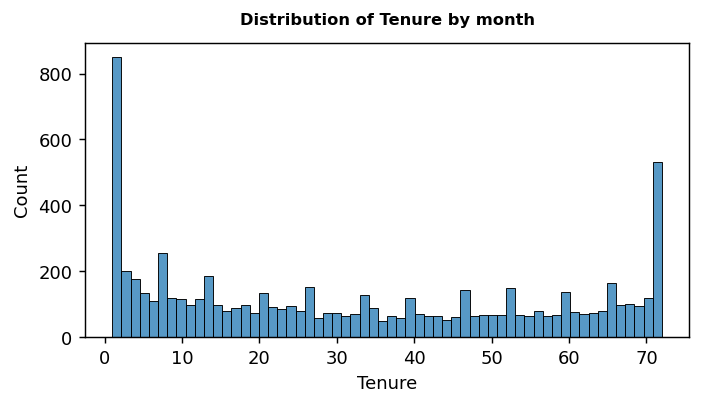

In [ ]:
#the amount of months a customer was or has been on a customer
plt.figure(figsize=(6,3), dpi=130)
sns.histplot(data=df,x='Tenure',bins=60)
plt.title("Distribution of Tenure by month", fontsize = 9, pad = 10, fontweight='bold')
plt.show()

Very large number of people tenured within a short period of time like 1st or 2nd month of subscription.The month-to-month contract customers are being Tenured after a month. The second largest count is in over 70 months. They were in a two years of contract and being tenured after a long time their contract is over. The spikes around 24 and 48 shows that customers are tenured after 1-year or 2-years of  contracts.

The histogram displays how many months the customers has been kept the subscription.

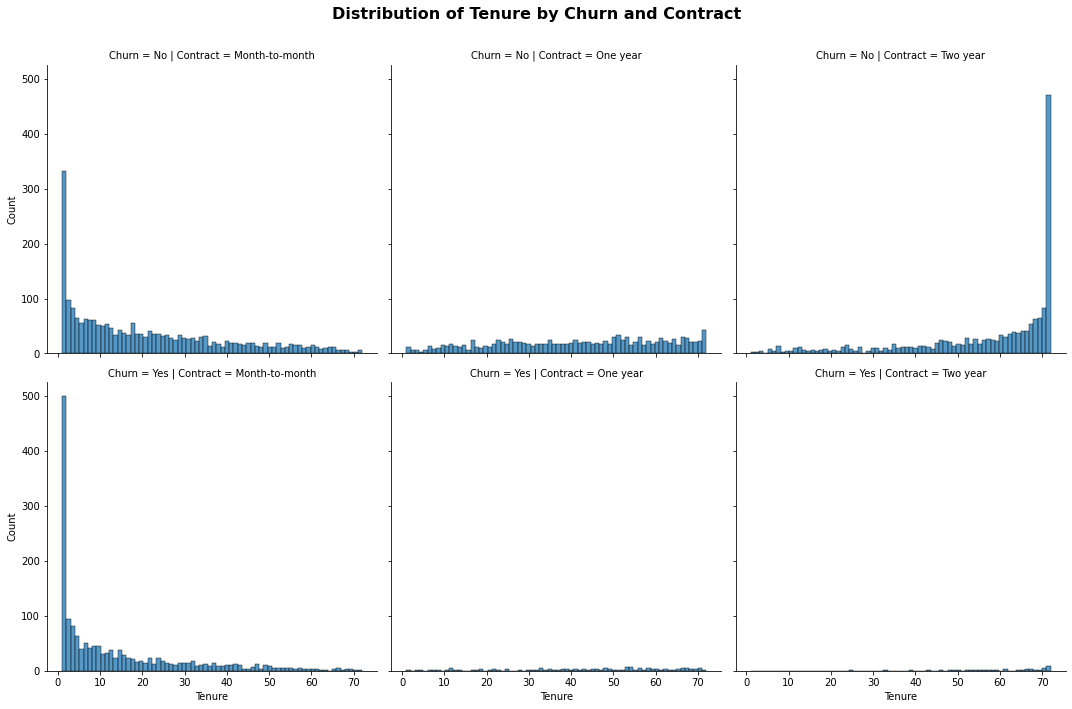

In [ ]:
#histograms separated by Churn and Contract
rel=sns.displot(data=df,x='Tenure',bins=70,col='Contract',row='Churn')
rel.fig.subplots_adjust(top=.9)
rel.fig.suptitle("Distribution of Tenure by Churn and Contract", fontsize = 16, fontweight='bold')
plt.show()

Very few customers churned who has 1-year or 2-year contract. The yes and no churn is evenly distributed in month-to-month contract.
The company needs for focus on month-to-month contract.

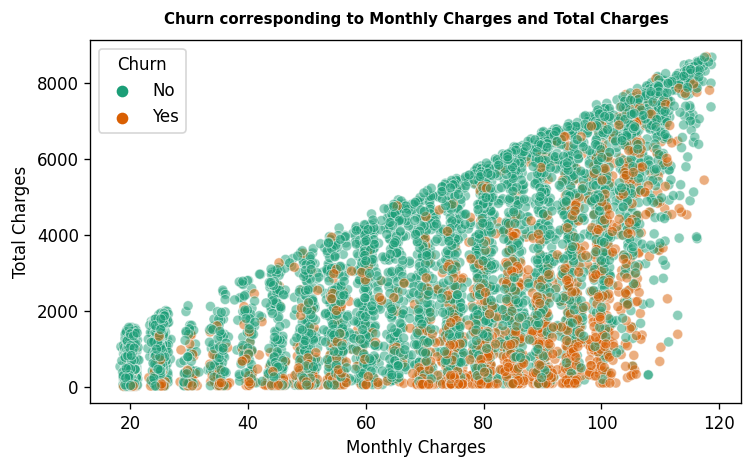

In [ ]:
plt.figure(figsize=(7,4), dpi=120)
sns.scatterplot(data=df,x='Monthly Charges',y='Total Charges',hue='Churn', linewidth=0.5,alpha=0.5,palette='Dark2')
plt.title("Churn corresponding to Monthly Charges and Total Charges", fontsize = 9, pad= 10, fontweight='bold')
plt.show()

The customers are churning who has high monthly charges.

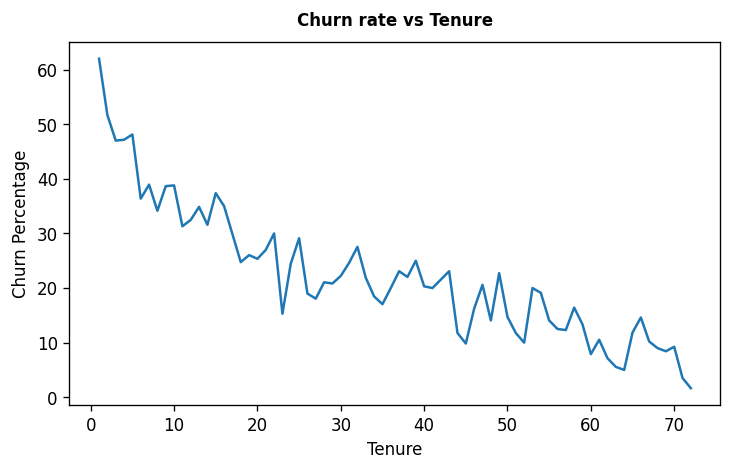

In [ ]:
# plot churn rate per months of tenure
plt.figure(figsize=(7,4), dpi=120)
no_churn = df.groupby(['Churn','Tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','Tenure']).count().transpose()['Yes']
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

#plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage')
plt.title("Churn rate vs Tenure", fontsize = 10, pad=10, fontweight='bold')
plt.show()

The longer the time customers are subscribing, they are less likely to churn

In [ ]:
#cohort analysis
def cohort(Tenure):
    if Tenure < 13:
        return '0-12 Months'
    elif Tenure < 25:
        return '12-24 Months'
    elif Tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [ ]:
df['Tenure Cohort'] = df['Tenure'].apply(cohort)

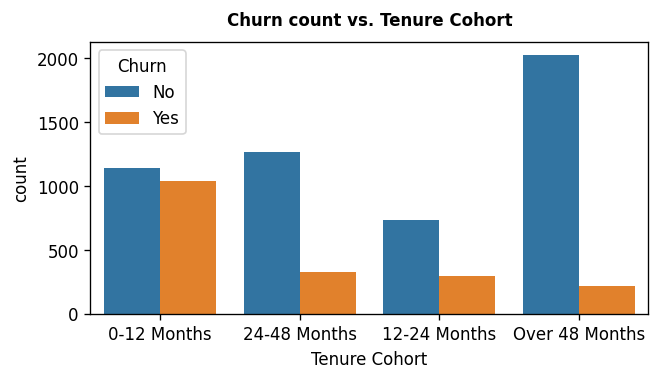

In [ ]:
plt.figure(figsize=(6,3),dpi=120)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')
plt.title("Churn count vs. Tenure Cohort", fontsize = 10, pad=10, fontweight= 'bold')
plt.show()

The customers who are staying over 48 months are less likely to churn. However, the customers who are staying 0-12 months are most likely to churn. 

<Figure size 2000x800 with 0 Axes>

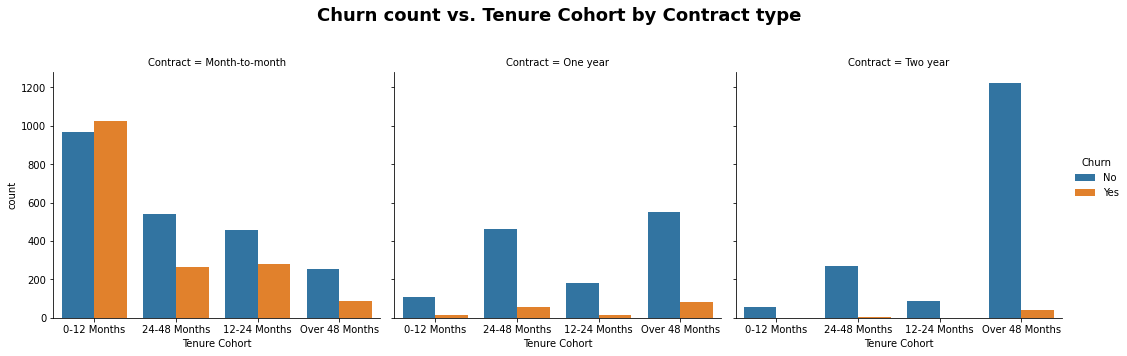

In [ ]:
plt.figure(figsize=(10,4),dpi=200)
rel=sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count')
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle("Churn count vs. Tenure Cohort by Contract type", fontsize = 18, fontweight='bold')
plt.show()

The customers who has signed up for 1-year or 2-year contract, they are less likely to churn. The company should pay attention more to the month-to-month customers. May be they can introduce a promotional offer after completing first few months

In [ ]:
df[['Tenure','Total Charges','Monthly Charges']].describe()

,Tenure,Total Charges,Monthly Charges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,2283.300441,64.798208
std,24.545260,2266.771362,30.085974
min,1.000000,18.800000,18.250000
25%,9.000000,401.450000,35.587500
50%,29.000000,1397.475000,70.350000
75%,55.000000,3794.737500,89.862500
max,72.000000,8684.800000,118.750000


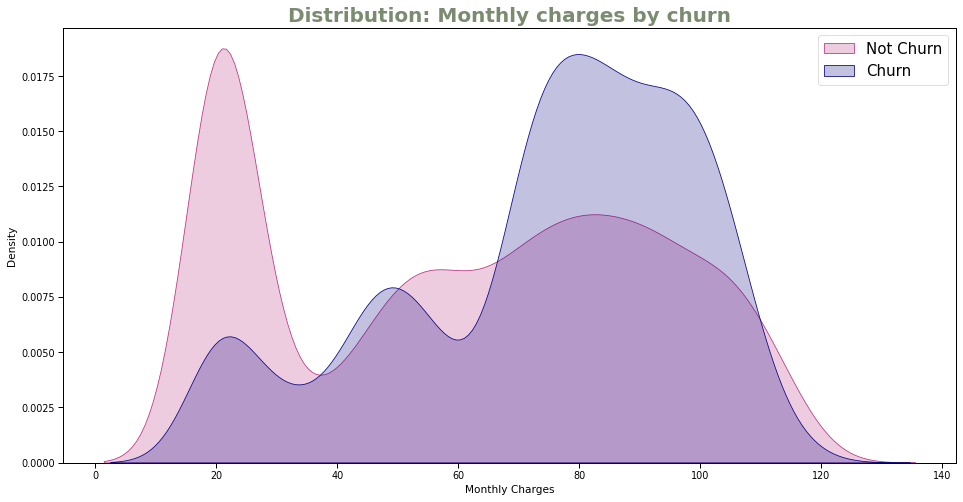

In [ ]:
color_discrete_sequence=['#0d0887', '#46039f', '#7201a8', '#9c179e', '#bd3786']

sns.set_context("paper",font_scale=1.1)
_, ax = plt.subplots(figsize=(16,8))
ax = sns.kdeplot(df['Monthly Charges'][(df["Churn"] == 'No') ],
                color=color_discrete_sequence[4], shade = True);
ax = sns.kdeplot(df['Monthly Charges'][(df["Churn"] == 'Yes') ],
                ax =ax, color=color_discrete_sequence[0], shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right',fontsize=15);
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution: Monthly charges by churn',fontdict={'fontsize':20,'color':'#7b8b6f','fontweight':'bold'});

In [ ]:
payment_count = df["Payment Method"].value_counts()

In [ ]:
fig = px.box(df, x='Churn', y = 'Monthly Charges')

# Update yaxis properties
fig.update_yaxes(title_text='Monthly Charges', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Monthly Charges vs Churn</b>',
)

fig.show()

In [ ]:
color_discrete_sequence=['#7b8b6f','#a29988','#c7b8a1','#90A5A7','#a27e7e']
# color_discrete_sequence=['#90A5A7','#F0DFA7','#C2B099','#C18265','#A86355']

fig = make_subplots(rows=1, cols=3)
fig.add_trace(go.Box(y=df['Monthly Charges'],name='MonthlyCharges',marker={'color':color_discrete_sequence[1]}),row=1,col=2)
fig.add_trace(go.Box(y=df['Total Charges'],name='TotalCharges',marker={'color':color_discrete_sequence[2]}),row=1,col=3)
fig.update_layout(height=600, width=800, title_text="<b style='color:#7b8b6f'>   MonthlyCharges and TotalCharges</b>")
fig.show()

By looking at the monthly charges, most of the customers are 

In [ ]:
df = df.drop(['Customer ID','LoyaltyID','Tenure Cohort', 'count'], axis = 1)
df.head()

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
for i in df.columns:
  print(i, df[i].unique())

Senior Citizen ['No' 'Yes']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
Tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Phone Service ['No' 'Yes']
Multiple Lines ['No phone service' 'No' 'Yes']
Internet Service ['DSL' 'Fiber optic' 'No']
Online Security ['No' 'Yes' 'No internet service']
Online Backup ['Yes' 'No' 'No internet service']
Device Protection ['No' 'Yes' 'No internet service']
Tech Support ['No' 'Yes' 'No internet service']
Streaming TV ['No' 'Yes' 'No internet service']
Streaming Movies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
Paperless Billing ['Yes' 'No']
Payment Method ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Monthly Charges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Total Charges [  29.85 1889.5   108.

In [ ]:
#normalize all the categorical data
columns=['Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Payment Method']

columns_label_encode = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing', 'Churn']

from sklearn.preprocessing import LabelEncoder

df_le_columns = df[columns_label_encode]
for i in df_le_columns.columns:
    encode = LabelEncoder()
    df_le_columns[i] = encode.fit_transform(df_le_columns[i])
    
df_le_columns.head()

,Senior Citizen,Partner,Dependents,Phone Service,Paperless Billing,Churn
0,0,1,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,1,1,1
3,0,0,0,0,0,0
4,0,0,0,1,1,1


In [ ]:
for i in df_le_columns.columns:
  df[i] = df_le_columns[i]

df.head()

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
df = pd.get_dummies(df,columns=columns)
df.head()

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Churn,Multiple Lines_No,...,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,1,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
#df.corr()
#round(df.corr(),2).to_excel("correlation_2.xlsx")

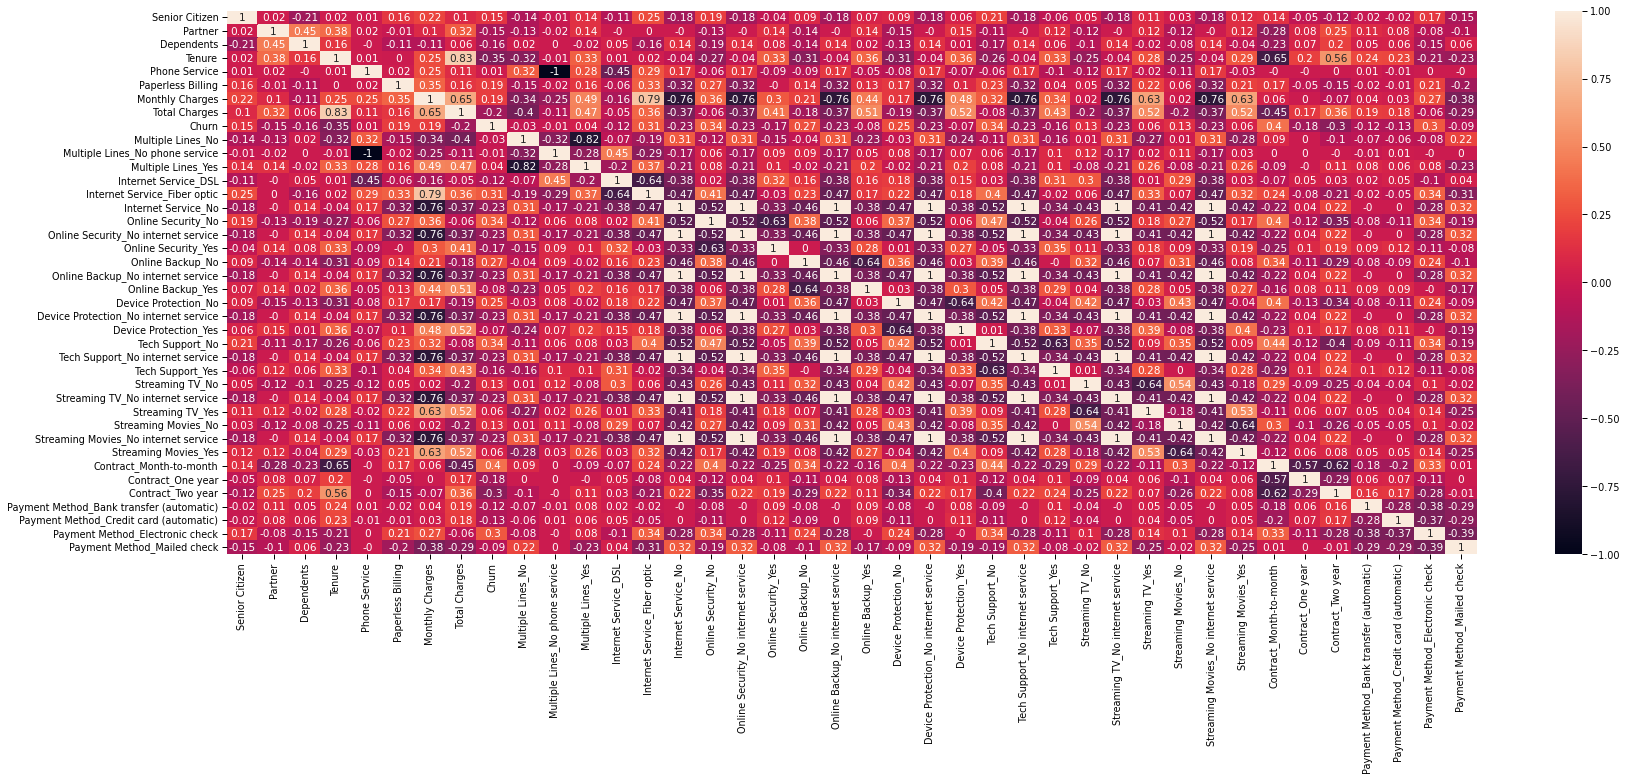

In [ ]:
fig, ax = plt.subplots(figsize=(28,10))
sns.heatmap(round(df.corr(),2), annot = True)

1. Monthly charges: If no internet service, less likely to churn, may have only phone service and no other services
        
2. All the internet service dependents on internet service no: if there is no internet service, less likely to churn

In [ ]:
X = df.drop(columns = ['Churn'])
X_unnorm = X.copy()
X.head()

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Multiple Lines_No,Multiple Lines_No phone service,...,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,0,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
y = df['Churn'].values
y

array([0, 0, 1, ..., 0, 1, 0])

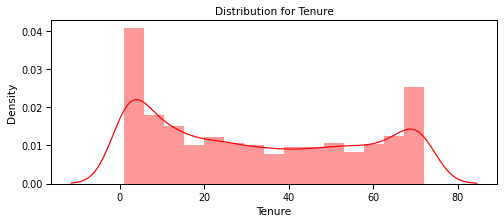

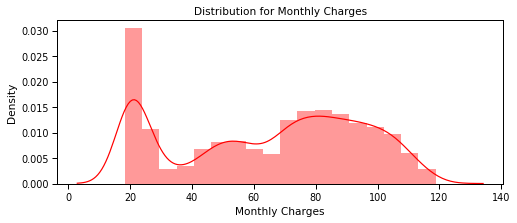

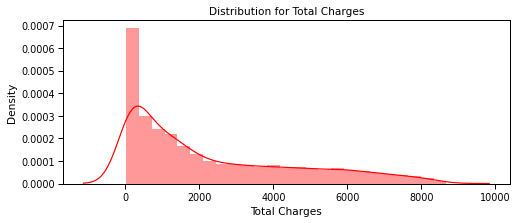

In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)
num_cols = ['Tenure', 'Monthly Charges', 'Total Charges']
for feat in num_cols: distplot(feat, df)

From these three distributions we could see that the ranges are very wild so we need to standardlize the numerical data.

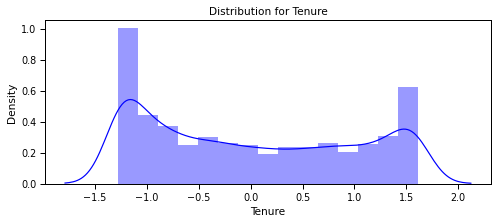

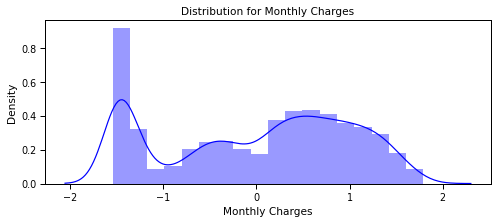

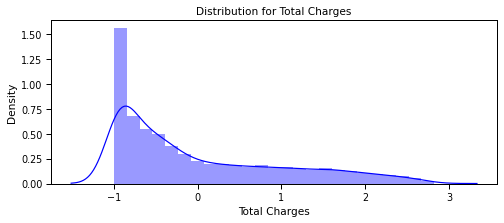

In [ ]:
#the numerical features are distributed over different value ranges,
#standard scalar helps to scale them down to the same range.
new_cols= X[num_cols]
#new_cols
sc= StandardScaler().fit(new_cols.values)
new_features = sc.transform(new_cols.values)
X[num_cols] = new_features

for feat in X[num_cols]: distplot(feat,X, color='b')

In [ ]:
X.head()

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Multiple Lines_No,Multiple Lines_No phone service,...,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0.064303,1,0,-0.260878,-0.173740,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,0,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

#split data into 70% and 30% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [ ]:
#build models without feature selection

# SVM
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

svm = SVC(probability = True, random_state = 1)
svm.fit(X_train, y_train)
y_svm_pred = svm.predict(X_test)

print(classification_report(y_test, y_svm_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1019
           1       0.69      0.49      0.57       388

    accuracy                           0.80      1407
   macro avg       0.76      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [ ]:
print('Accuracy : %3f' % accuracy_score(y_test, y_svm_pred))
print('Precision : %3f' % precision_score(y_test, y_svm_pred))
print('Recall : %3f' % recall_score(y_test, y_svm_pred))
print('F1 : %3f' % f1_score(y_test, y_svm_pred))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test, y_svm_pred))

Accuracy : 0.798863
Precision : 0.692308
Recall : 0.487113
F1 : 0.571861
kappa_statistic : 0.445569


In [ ]:
#Random Forest
rf = RandomForestClassifier(criterion='gini', max_depth=6, n_estimators=100, random_state=1)
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1019
           1       0.69      0.48      0.56       388

    accuracy                           0.80      1407
   macro avg       0.76      0.70      0.72      1407
weighted avg       0.79      0.80      0.78      1407



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, cohen_kappa_score

In [ ]:
print('Accuracy : %3f' % accuracy_score(y_test, y_pred_rf))
print('Precision : %3f' % precision_score(y_test, y_pred_rf))
print('Recall : %3f' % recall_score(y_test, y_pred_rf))
print('F1 : %3f' % f1_score(y_test, y_pred_rf))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test, y_pred_rf))

Accuracy : 0.797441
Precision : 0.692884
Recall : 0.476804
F1 : 0.564885
kappa_statistic : 0.438691


In [ ]:
# Logistic Regression
logistic = LogisticRegression(solver='liblinear', penalty='l2', C= 0.01, random_state=1)
logistic.fit(X_train, y_train)

y_pred_lr = logistic.predict(X_test)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1019
           1       0.69      0.51      0.59       388

    accuracy                           0.80      1407
   macro avg       0.76      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [ ]:
print('Accuracy : %3f' % accuracy_score(y_test, y_pred_lr))
print('Precision : %3f' % precision_score(y_test, y_pred_lr))
print('Recall : %3f' % recall_score(y_test, y_pred_lr))
print('F1 : %3f' % f1_score(y_test, y_pred_lr))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test, y_pred_lr))

Accuracy : 0.801706
Precision : 0.688581
Recall : 0.512887
F1 : 0.587888
kappa_statistic : 0.460982


In [ ]:
#XGBoost, building the model & printing the score
import xgboost as xgb
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print('Accuracy of XGB classifier on training set: {:.2f}'.format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'.format(xgb_model.score(X_test[X_train.columns], y_test)))
print(classification_report(y_test, y_pred_xgb))

Accuracy of XGB classifier on training set: 0.84
Accuracy of XGB classifier on test set: 0.80
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1019
           1       0.67      0.51      0.58       388

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [ ]:
print('Accuracy : %3f' % accuracy_score(y_test, y_pred_xgb))
print('Precision : %3f' % precision_score(y_test, y_pred_xgb))
print('Recall : %3f' % recall_score(y_test, y_pred_xgb))
print('F1 : %3f' % f1_score(y_test, y_pred_xgb))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test, y_pred_xgb))

Accuracy : 0.796020
Precision : 0.673540
Recall : 0.505155
F1 : 0.577320
kappa_statistic : 0.446486


In [ ]:
X.columns

Index(['Senior Citizen', 'Partner', 'Dependents', 'Tenure', 'Phone Service',
       'Paperless Billing', 'Monthly Charges', 'Total Charges',
       'Multiple Lines_No', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes', 'Internet Service_DSL',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_No', 'Online Security_No internet service',
       'Online Security_Yes', 'Online Backup_No',
       'Online Backup_No internet service', 'Online Backup_Yes',
       'Device Protection_No', 'Device Protection_No internet service',
       'Device Protection_Yes', 'Tech Support_No',
       'Tech Support_No internet service', 'Tech Support_Yes',
       'Streaming TV_No', 'Streaming TV_No internet service',
       'Streaming TV_Yes', 'Streaming Movies_No',
       'Streaming Movies_No internet service', 'Streaming Movies_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'Payment Method_Bank transfer (automatic)',
  

**Feature Selection**

In [ ]:
#dropping columns based on the observation of correlation matrix

drop_columns = ['Online Security_No internet service','Online Backup_No internet service',
                   'Device Protection_No internet service','Tech Support_No internet service',
                   'Streaming TV_No internet service','Streaming Movies_No internet service',
               'Multiple Lines_No phone service']

X_2 = X.copy()
X_2 = X_2.drop(columns = drop_columns)
X_2.shape

(7032, 32)

In [ ]:
#Feature selection using Random Forest
from sklearn.ensemble import RandomForestClassifier

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_2, y, test_size = 0.30)
forest = RandomForestClassifier(criterion="entropy", max_depth=3, n_estimators=500, random_state=1)

forest.fit(X_train_1,y_train_1)
importances = forest.feature_importances_
pd.DataFrame({"feature": X_train_1.columns, "importances": importances}).sort_values("importances", ascending=False).reset_index(drop=True)

,feature,importances
0,Contract_Month-to-month,0.212893
1,Tenure,0.117559
2,Online Security_No,0.113437
3,Tech Support_No,0.108341
4,Contract_Two year,0.095696
5,Internet Service_Fiber optic,0.060470
6,Payment Method_Electronic check,0.047541
7,Total Charges,0.043666
8,Online Backup_No,0.038486
9,Monthly Charges,0.037821


In [ ]:
# Feature selection by decision tree with Gini index:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=5, random_state=1)
dt_gini.fit(X_train_1,y_train_1)
dt_importances = dt_gini.feature_importances_
pd.DataFrame({"feature": X_train_1.columns, "importances": dt_importances}).sort_values("importances", ascending=False).reset_index(drop=True)

,feature,importances
0,Contract_Month-to-month,0.463455
1,Tenure,0.168999
2,Internet Service_Fiber optic,0.138910
3,Monthly Charges,0.069196
4,Total Charges,0.051169
5,Tech Support_No,0.027871
6,Payment Method_Electronic check,0.013970
7,Online Security_Yes,0.013950
8,Phone Service,0.009913
9,Contract_Two year,0.009650


In [ ]:
#Feature selection with Chi-Square Test
from sklearn.feature_selection import chi2

X_unnorm = X_unnorm.drop(columns = drop_columns)
chi_scores = chi2(X_unnorm,y)

#The first array contains the chi-square scores; the higher the score, the better. The second array contains the p-values, they should be as little as possible.
p_values = pd.Series(chi_scores[1],index = X_unnorm.columns)
p_values.sort_values(ascending = True , inplace = True)


In [ ]:
pd.DataFrame(p_values)

,0
Tenure,0.000000e+00
Monthly Charges,0.000000e+00
Total Charges,0.000000e+00
Contract_Month-to-month,2.195119e-114
Contract_Two year,9.454286e-108
Payment Method_Electronic check,3.105849e-94
Online Security_No,4.846910e-92
Tech Support_No,7.376364e-90
Internet Service_Fiber optic,6.587130e-83
Internet Service_No,4.814000e-64


**Random Forest with Selected Features**

In [ ]:
X_selected_features=df[["Contract_Month-to-month", "Online Security_No", "Tenure", "Contract_Two year", 'Tech Support_No', 'Internet Service_Fiber optic',
                       'Total Charges', 'Monthly Charges', 'Payment Method_Electronic check', 'Online Backup_No', 'Internet Service_No', 'Contract_One year',
                       'Device Protection_No', 'Tech Support_Yes', "Online Security_Yes"]]

In [ ]:
X_sf_train, X_sf_test, y_sf_train, y_sf_test = train_test_split(X_selected_features, y, test_size = 0.20)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#Random Forest with selected features
rf_sf = RandomForestClassifier(criterion='gini', max_depth=10, n_estimators=1000, random_state=1)
rf_sf.fit(X_sf_train,y_sf_train)

y_pred_sf_rf = rf_sf.predict(X_sf_test)

print(classification_report(y_sf_test, y_pred_sf_rf))
print('Accuracy : %3f' % accuracy_score(y_sf_test, y_pred_sf_rf))
print('Precision : %3f' % precision_score(y_sf_test, y_pred_sf_rf))
print('Recall : %3f' % recall_score(y_sf_test, y_pred_sf_rf))
print('F1 : %3f' % f1_score(y_sf_test, y_pred_sf_rf))
print('kappa_statistic : %3f' % cohen_kappa_score(y_sf_test, y_pred_sf_rf))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1026
           1       0.63      0.51      0.56       381

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Accuracy : 0.787491
Precision : 0.634868
Recall : 0.506562
F1 : 0.563504
kappa_statistic : 0.425398


In [ ]:
#SVM with selected features
svm_sf = SVC(probability = True, random_state = 1)
svm_sf.fit(X_sf_train,y_sf_train)
y_sf_svm_pred = svm_sf.predict(X_sf_test)

print(classification_report(y_sf_test, y_sf_svm_pred))
print('Accuracy : %3f' % accuracy_score(y_sf_test, y_sf_svm_pred))
print('Precision : %3f' % precision_score(y_sf_test, y_sf_svm_pred))
print('Recall : %3f' % recall_score(y_sf_test, y_sf_svm_pred))
print('F1 : %3f' % f1_score(y_sf_test, y_sf_svm_pred))
print('kappa_statistic : %3f' % cohen_kappa_score(y_sf_test, y_sf_svm_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1026
           1       0.00      0.00      0.00       381

    accuracy                           0.73      1407
   macro avg       0.36      0.50      0.42      1407
weighted avg       0.53      0.73      0.62      1407

Accuracy : 0.729211
Precision : 0.000000
Recall : 0.000000
F1 : 0.000000
kappa_statistic : 0.000000


In [ ]:
#XGBoost with selected features
import xgboost as xgb
xgb_sf = xgb.XGBClassifier(max_depth=4, learning_rate=0.07, objective= 'binary:logistic',n_jobs=-1)
xgb_sf.fit(X_sf_train, y_sf_train)
print('Accuracy of XGB classifier on training set: {:.2f}'.format(xgb_sf.score(X_sf_train, y_sf_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'.format(xgb_sf.score(X_sf_test[X_sf_train.columns], y_sf_test)))

Accuracy of XGB classifier on training set: 0.82
Accuracy of XGB classifier on test set: 0.79


In [ ]:
y_sf_pred_xgb = xgb_sf.predict(X_sf_test)
print(classification_report(y_sf_test, y_sf_pred_xgb))
print('Accuracy : %3f' % accuracy_score(y_sf_test, y_sf_pred_xgb))
print('Precision : %3f' % precision_score(y_sf_test, y_sf_pred_xgb))
print('Recall : %3f' % recall_score(y_sf_test, y_sf_pred_xgb))
print('F1 : %3f' % f1_score(y_sf_test, y_sf_pred_xgb))
print('kappa_statistic : %3f' % cohen_kappa_score(y_sf_test, y_sf_pred_xgb))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1026
           1       0.64      0.50      0.56       381

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Accuracy : 0.786780
Precision : 0.635452
Recall : 0.498688
F1 : 0.558824
kappa_statistic : 0.420926


In [ ]:
#Logistic Regression with selected features
logistic = LogisticRegression(solver='liblinear', penalty='l2', C= 0.01, random_state=1)
logistic.fit(X_sf_train,y_sf_train)

y_sf_pred_lr = logistic.predict(X_sf_test)

print(classification_report(y_sf_test, y_sf_pred_lr))
print('Accuracy : %3f' % accuracy_score(y_sf_test, y_sf_pred_lr))
print('Precision : %3f' % precision_score(y_sf_test, y_sf_pred_lr))
print('Recall : %3f' % recall_score(y_sf_test, y_sf_pred_lr))
print('F1 : %3f' % f1_score(y_sf_test, y_sf_pred_lr))
print('kappa_statistic : %3f' % cohen_kappa_score(y_sf_test, y_sf_pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1026
           1       0.65      0.52      0.58       381

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407

Accuracy : 0.796020
Precision : 0.653595
Recall : 0.524934
F1 : 0.582242
kappa_statistic : 0.449429


**Evaluation metrics**

In [ ]:
# Confusion Matrix for models without/with Feature Selection

# Random Forest (before feature selection)
confmat_rf = pd.DataFrame(confusion_matrix(y_test,y_pred_rf),
                       index=['True[Not churn]','True[Churn]'],
                       columns=['Predict[Not churn]','Predict[Churn]'])
confmat_rf

,Predict[Not churn],Predict[Churn]
True[Not churn],937,82
True[Churn],203,185


In [ ]:
import sklearn.metrics as metrics
sensitivity = metrics.recall_score(y_test, y_pred_rf, pos_label=1)
print('sensitivity: ', sensitivity)
specificity = metrics.recall_score(y_test, y_pred_rf, pos_label=0)
print('specificity: ', specificity)

sensitivity:  0.47680412371134023
specificity:  0.9195289499509323


In [ ]:
# Random Forest (after feature selection)
confmat_rf_sf = pd.DataFrame(confusion_matrix(y_sf_test,y_pred_sf_rf),
                       index=['True[Not churn]','True[Churn]'],
                       columns=['Predict[Not churn]','Predict[Churn]'])
print('For RandomForest:')
confmat_rf_sf

For RandomForest:


,Predict[Not churn],Predict[Churn]
True[Not churn],915,111
True[Churn],188,193


In [ ]:
sensitivity = metrics.recall_score(y_sf_test, y_pred_sf_rf, pos_label=1)
print('sensitivity: ', sensitivity)
specificity = metrics.recall_score(y_sf_test, y_pred_sf_rf, pos_label=0)
print('specificity: ', specificity)

sensitivity:  0.5065616797900262
specificity:  0.8918128654970761


In [ ]:
# SVM (before feature selection)
confmat_svm = pd.DataFrame(confusion_matrix(y_test,y_svm_pred),
                       index=['True[Not churn]','True[Churn]'],
                       columns=['Predict[Not churn]','Predict[Churn]'])
confmat_svm

,Predict[Not churn],Predict[Churn]
True[Not churn],935,84
True[Churn],199,189


In [ ]:
sensitivity = metrics.recall_score(y_test, y_svm_pred, pos_label=1)
print('sensitivity: ', sensitivity)
specificity = metrics.recall_score(y_test, y_svm_pred, pos_label=0)
print('specificity: ', specificity)

sensitivity:  0.48711340206185566
specificity:  0.9175662414131501


In [ ]:
# SVM (after feature selection)
confmat_svm_sf = pd.DataFrame(confusion_matrix(y_sf_test,y_sf_svm_pred),
                       index=['True[Not churn]','True[Churn]'],
                       columns=['Predict[Not churn]','Predict[Churn]'])
print('For SVM:')
confmat_svm_sf

For SVM:


,Predict[Not churn],Predict[Churn]
True[Not churn],1026,0
True[Churn],381,0


In [ ]:
sensitivity = metrics.recall_score(y_sf_test, y_sf_svm_pred, pos_label=1)
print('sensitivity: ', sensitivity)
specificity = metrics.recall_score(y_sf_test, y_sf_svm_pred, pos_label=0)
print('specificity: ', specificity)

sensitivity:  0.0
specificity:  1.0


In [ ]:
# XGBoost (before feature selection)
confmat_xgb = pd.DataFrame(confusion_matrix(y_test,y_pred_xgb),
                       index=['True[Not churn]','True[Churn]'],
                       columns=['Predict[Not churn]','Predict[Churn]'])
confmat_xgb

,Predict[Not churn],Predict[Churn]
True[Not churn],924,95
True[Churn],192,196


In [ ]:
sensitivity = metrics.recall_score(y_test, y_pred_xgb, pos_label=1)
print('sensitivity: ', sensitivity)
specificity = metrics.recall_score(y_test, y_pred_xgb, pos_label=0)
print('specificity: ', specificity)

sensitivity:  0.5051546391752577
specificity:  0.9067713444553483


In [ ]:
# XGBoost (after feature selection)
confmat_xgb_sf = pd.DataFrame(confusion_matrix(y_sf_test,y_sf_pred_xgb),
                       index=['True[Not churn]','True[Churn]'],
                       columns=['Predict[Not churn]','Predict[Churn]'])
print('For XGBoost:')
confmat_xgb_sf

For XGBoost:


,Predict[Not churn],Predict[Churn]
True[Not churn],917,109
True[Churn],191,190


In [ ]:
sensitivity = metrics.recall_score(y_sf_test, y_sf_pred_xgb, pos_label=1)
print('sensitivity: ', sensitivity)
specificity = metrics.recall_score(y_sf_test, y_sf_pred_xgb, pos_label=0)
print('specificity: ', specificity)

sensitivity:  0.49868766404199477
specificity:  0.8937621832358674


In [ ]:
# Logistic Regression (before feature selection)
confmat_lr = pd.DataFrame(confusion_matrix(y_test,y_pred_lr),
                       index=['True[Not churn]','True[Churn]'],
                       columns=['Predict[Not churn]','Predict[Churn]'])
confmat_lr

,Predict[Not churn],Predict[Churn]
True[Not churn],929,90
True[Churn],189,199


In [ ]:
sensitivity = metrics.recall_score(y_test, y_pred_lr, pos_label=1)
print('sensitivity: ', sensitivity)
specificity = metrics.recall_score(y_test, y_pred_lr, pos_label=0)
print('specificity: ', specificity)

sensitivity:  0.5128865979381443
specificity:  0.9116781157998037


In [ ]:
# Logistic Regression (after feature selection)
confmat_lr_sf = pd.DataFrame(confusion_matrix(y_sf_test,y_sf_pred_lr),
                       index=['True[Not churn]','True[Churn]'],
                       columns=['Predict[Not churn]','Predict[Churn]'])
print('For LogisticRegression: ')
confmat_lr_sf

For LogisticRegression: 


,Predict[Not churn],Predict[Churn]
True[Not churn],920,106
True[Churn],181,200


In [ ]:
sensitivity = metrics.recall_score(y_sf_test, y_sf_pred_lr, pos_label=1)
print('sensitivity: ', sensitivity)
specificity = metrics.recall_score(y_sf_test, y_sf_pred_lr, pos_label=0)
print('specificity: ', specificity)

sensitivity:  0.5249343832020997
specificity:  0.8966861598440545


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import plot_roc_curve

In [ ]:
# Instantiate the classfiers and make a list
classifiers = [RandomForestClassifier(random_state=1234), 
               SVC(probability=True), 
               LogisticRegression(random_state=1234),
               xgb.XGBClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_sf_train, y_sf_train)
    yproba = model.predict_proba(X_sf_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_sf_test,  yproba)
    auc = roc_auc_score(y_sf_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

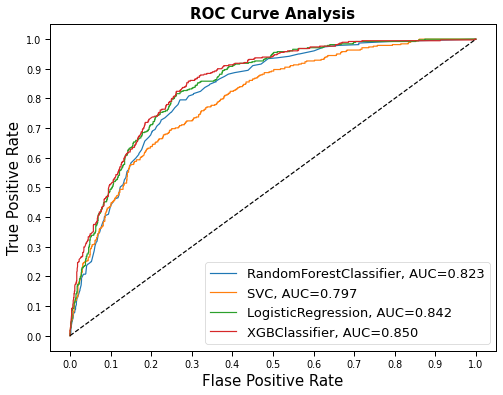

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [ ]:
# auc_xgb = roc_auc_score(y_sf_test, y_sf_pred_xgb)
# auc_rf = roc_auc_score(y_sf_test, y_pred_sf_rf)
# auc_svm = roc_auc_score(y_sf_test, y_sf_svm_pred)
# auc_lr = roc_auc_score(y_sf_test, y_sf_pred_lr)
# fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_sf_test, y_sf_pred_xgb)
# fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_sf_test, y_pred_sf_rf)
# fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_sf_test, y_sf_svm_pred)
# fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_sf_test, y_sf_pred_lr)

In [ ]:
# plt.figure(figsize=(12, 7))
# plt.plot(fpr_xgb, tpr_xgb, label=f'AUC (XGBoost) = {auc_xgb:.2f}')
# plt.plot(fpr_rf, tpr_rf, label=f'AUC (RandomForest) = {auc_rf:.2f}')
# plt.plot(fpr_svm, tpr_svm, label=f'AUC (SVM) = {auc_svm:.2f}')
# plt.plot(fpr_lr, tpr_lr, label=f'AUC (LogisticRegression) = {auc_lr:.2f}')
# plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
# plt.title('ROC Curve Analysis', size=20)
# plt.xlabel('False Positive Rate', size=14)
# plt.ylabel('True Positive Rate', size=14)
# plt.legend();

In [ ]:
!pip install scikit-plot

Random forest


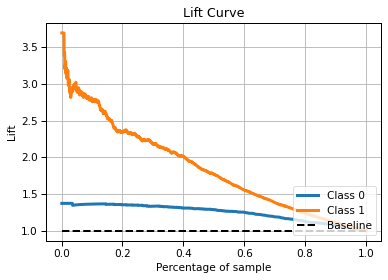

Logistic Regression


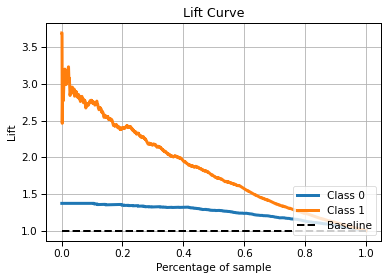

XGBoost


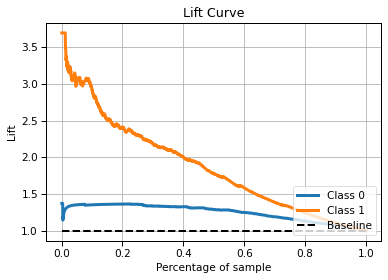

SVM


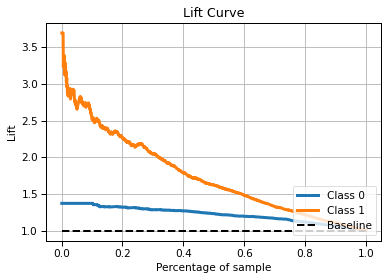

In [ ]:
# Lift Curve for all the 4 models
import scikitplot as skplt
rf_proba = rf_sf.predict_proba(X_sf_test)
lr_proba = logistic.predict_proba(X_sf_test)
xgb_proba = xgb_sf.predict_proba(X_sf_test)
svm_proba = svm_sf.predict_proba(X_sf_test)

print('Random forest')
skplt.metrics.plot_lift_curve(y_sf_test,rf_proba)
plt.show()
print('Logistic Regression')
skplt.metrics.plot_lift_curve(y_sf_test,lr_proba)
plt.show()
print('XGBoost')
skplt.metrics.plot_lift_curve(y_sf_test,xgb_proba)
plt.show()
print('SVM')
skplt.metrics.plot_lift_curve(y_sf_test,svm_proba)
plt.show()